In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


## Implement "Beam_Search" 

In [ ]:
#  Link: https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/
import numpy as np

In [ ]:
def beam_search(data, k):
    sequences = [[list(), 0.0]]
    for row in data:
        all_candidates = list()
        for i in range(len(sequences)):
            seq, score = sequences[i]
            for j in range(len(row)):
                candidate = [seq + [j], score - log(row[j])]
                all_candidates.append(candidate)
        ordered = sorted(all_candidates, key = lambda point : point[1])
        sequences = ordered[:k]
    return sequences

In [ ]:
data = [[0.1, 0.2, 0.3, 0.4, 0.5],
		    [0.5, 0.4, 0.3, 0.2, 0.1],
		    [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1]]
data = np.array(data)
result = beam_search(data, 3)
for seq in result:
    print(seq)

[[4, 0, 4, 0, 4, 0, 4, 0, 4, 0], 6.931471805599453]
[[4, 0, 4, 0, 4, 0, 4, 0, 4, 1], 7.154615356913663]
[[4, 0, 4, 0, 4, 0, 4, 0, 3, 0], 7.154615356913663]


## Word_Embedding

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 23.9 MB 96 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


### Develop Word2Vec Embedding

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

      # train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)
# access vector for one word
print(model.wv['this'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print('\nModel after saving: ', new_model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-8.2426788e-03  9.2993546e-03 -1.9766092e-04 -1.9672776e-03
  4.6036290e-03 -4.0953159e-03  2.7431131e-03  6.9399667e-03
  6.0654259e-03 -7.5107957e-03  9.3823504e-03  4.6718074e-03
  3.9661191e-03 -6.2435055e-03  8.4599778e-03 -2.1501661e-03
  8.8251876e-03 -5.3620026e-03 -8.1294207e-03  6.8245577e-03
  1.6711927e-03 -2.1985101e-03  9.5135998e-03  9.4938539e-03
 -9.7740479e-03  2.5052286e-03  6.1566923e-03  3.8724565e-03
  2.0227861e-03  4.3050051e-04  6.7363022e-04 -3.8206363e-03
 -7.1402504e-03 -2.0888734e-03  3.9238976e-03  8.8186832e-03
  9.2591504e-03 -5.9759379e-03 -9.4026709e-03  9.7643761e-03
  3.4297847e-03  5.1661157e-03  6.2823440e-03 -2.8042626e-03
  7.3227026e-03  2.8302716e-03  2.8710032e-03 -2.3803711e-03
 -3.1282497e-03 -2.3701428e-03  4.2764354e-03  7.6057913e-05
 -9.5842788e-03 -9.6655441e-03 -6.148

## Visualize Word-Embedding with PCA

In [ ]:
#  Retrieve(Truy xuất) all of the vectors from a trained model
X = model.wv[model.wv.index_to_key]
print(X.shape)

(14, 100)


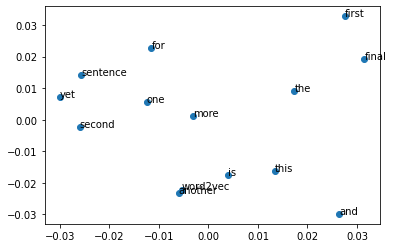

In [ ]:
#  Plot Word Vectors Using PCA
from sklearn.decomposition import PCA
from matplotlib import pyplot

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Load Google’s Word2Vec Embedding

In [ ]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


## Load Stanford’s GloVe Embedding

In [ ]:
#  Convert the GloVe file format to the word2vec file format
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]
